# Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car

Price  -- Offer Price in EUROs	

Age_08_04 -- Age in months as in August 2004	

Mfg_Month -- Manufacturing month (1-12)	

Mfg_Year	-- Manufacturing Year

KM -- Accumulated Kilometers on odometer

Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)

HP -- Horse Power

Met_Color	 -- Metallic Color?  (Yes=1, No=0)

Color -- Color (Blue, Red, Grey, Silver, Black, etc.)

Automatic	-- Automatic ( (Yes=1, No=0)

cc -- Cylinder Volume in cubic centimeters

Doors -- Number of doors

Cylinders	-- Number of cylinders

Gears -- Number of gear positions

Quarterly_Tax -- Quarterly road tax in EUROs

Weight -- Weight in Kilograms

Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)

BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)

Guarantee_Period -- 	Guarantee period in months

ABS -- Anti-Lock Brake System (Yes=1, No=0)

Airbag_1 -- Driver_Airbag  (Yes=1, No=0)

Airbag_2 -- Passenger Airbag  (Yes=1, No=0)

Airco -- Airconditioning  (Yes=1, No=0)

Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)

Boardcomputer -- Boardcomputer  (Yes=1, No=0)

CD_Player -- CD Player  (Yes=1, No=0)

Central_Lock -- Central Lock  (Yes=1, No=0)

Powered_Windows -- Powered Windows  (Yes=1, No=0)

Power_Steering -- Power Steering  (Yes=1, No=0)

Radio -- Radio  (Yes=1, No=0)

Mistlamps	-- Mistlamps  (Yes=1, No=0)

Sport_Model -- Sport Model  (Yes=1, No=0)

Backseat_Divider -- Backseat Divider  (Yes=1, No=0)

Metallic_Rim --Metallic Rim  (Yes=1, No=0)

Radio_cassette -- Radio Cassette  (Yes=1, No=0)

Tow_Bar -- Tow Bar  (Yes=1, No=0)



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
import numpy as np

In [3]:
cars = pd.read_csv("Toyoto_Corrola.csv")

In [4]:
cars.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [6]:
cars["Cylinders"].value_counts()

4    1436
Name: Cylinders, dtype: int64

In [7]:
cars["Gears"].value_counts()

5    1390
6      43
3       2
4       1
Name: Gears, dtype: int64

In [8]:
#As the cylinders are same for all the cars we can remove the column from the data set 
#as ID and name are not important for price difference we can drop the those columns 
cars1 = cars.drop(columns=["Model","Id","Cylinders"])
cars1

,Price,Age_08_04,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025
1432,10845,72,19000,86,3,5,1015
1433,8500,71,17016,86,3,5,1015
1434,7250,70,16916,86,3,5,1015


In [10]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age_08_04  1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Gears      1436 non-null   int64
 6   Weight     1436 non-null   int64
dtypes: int64(7)
memory usage: 78.7 KB


In [12]:
cars1.rename(columns={"Age_08_04":"Age"}, inplace=True)
cars1

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025
1432,10845,72,19000,86,3,5,1015
1433,8500,71,17016,86,3,5,1015
1434,7250,70,16916,86,3,5,1015


In [13]:
cars1.isna().sum()

Price     0
Age       0
KM        0
HP        0
Doors     0
Gears     0
Weight    0
dtype: int64

In [14]:
cars1.describe()

,Price,Age,KM,HP,Doors,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,4.033426,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.952677,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,2.000000,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,3.000000,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,4.000000,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,5.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,5.000000,6.000000,1615.00000


In [15]:
cars1.corr()

,Price,Age,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,0.063104,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,0.020613,1.000000


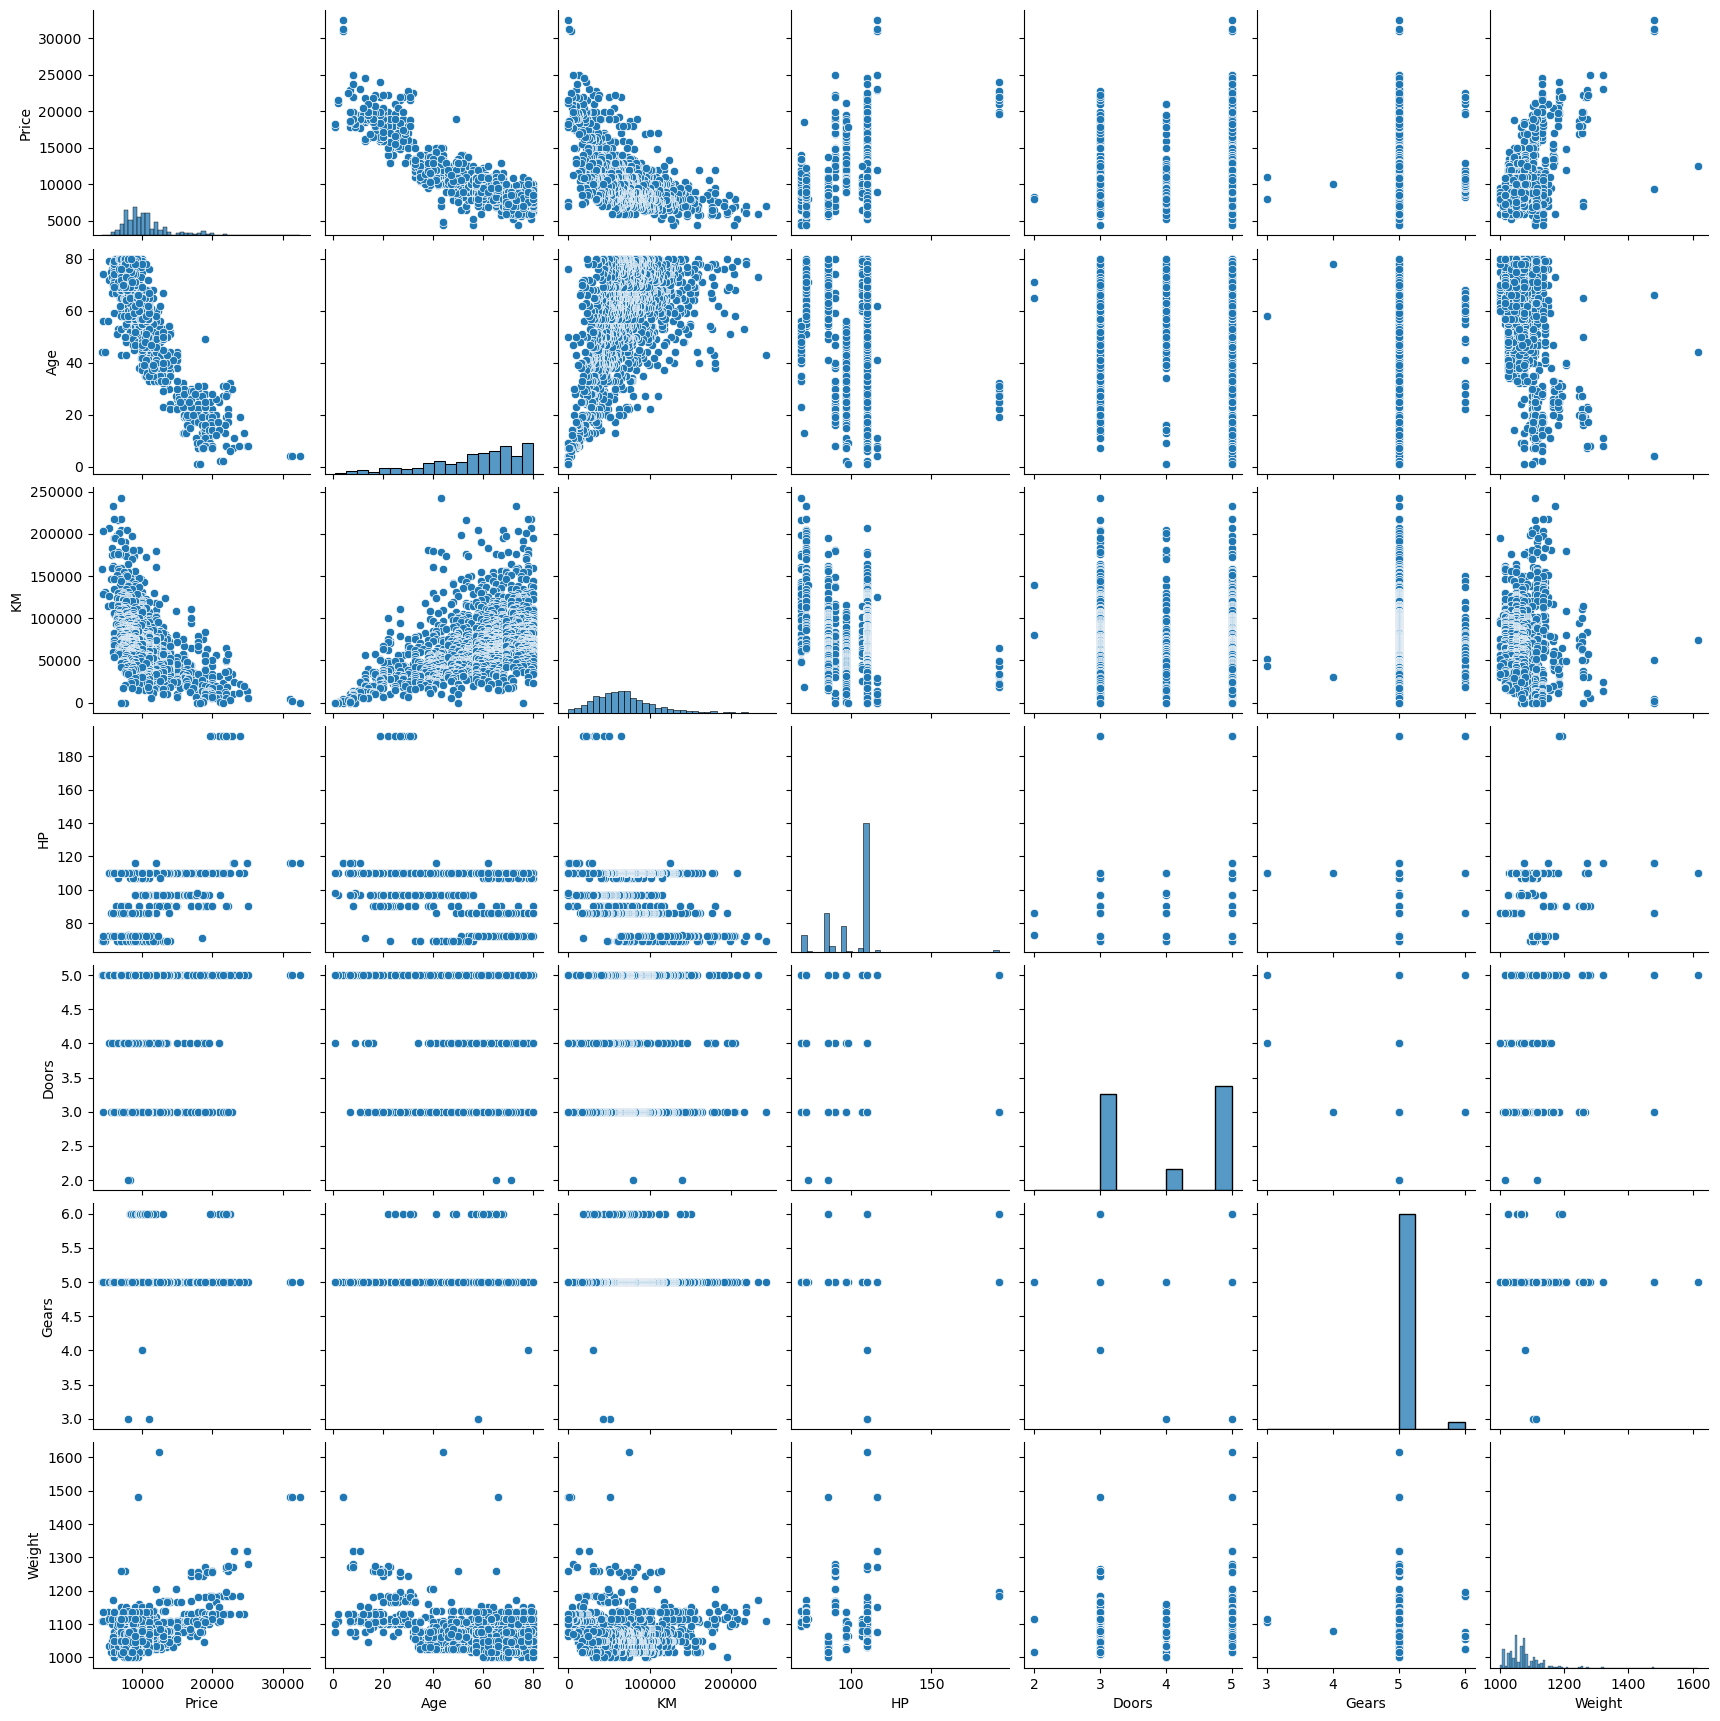

In [16]:
sns.pairplot(cars1)

Build the model 

In [20]:
import statsmodels.formula.api as smf
model1 = smf.ols('Price~Age+KM+HP+Doors+Gears+Weight',data=cars1).fit()

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:49:47   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6984.3736   1312.036     -5.323      0.000   -9558.097   -4410.650
Age         -122.2422      2.616    -46.729      0.000    -127.374    -117.111
KM            -0.0200      0.001    -16.543      0.000      -0.022      -0.018
HP            28.3501      2.615     10.842      0.000      23.221      33.479
Doors         -9.6802     39.992     -0.242      0.809     -88.129      68.769
Gears        622.2829    197.410      3.152      0.002     235.038    1009.528
Weight        18.6097      0.829     22.447      0.000      16.983      20.236
==============================================================================
Omnibus:                      199.596   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1569.510
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.065   Cond. No.                     2.90e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model1.params

Intercept   -6984.373566
Age          -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Gears         622.282925
Weight         18.609651
dtype: float64

In [23]:
# t and p Values
print(model1.tvalues,'\n',model1.pvalues)

Intercept    -5.323309
Age         -46.728942
KM          -16.542560
HP           10.842418
Doors        -0.242055
Gears         3.152234
Weight       22.446903
dtype: float64 
 Intercept     1.181900e-07
Age          4.387432e-290
KM            2.238900e-56
HP            2.231791e-26
Doors         8.087723e-01
Gears         1.653931e-03
Weight        7.856458e-96
dtype: float64


In [24]:
model2=smf.ols('Price~Age+KM+HP+Weight',data=cars1).fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2230.
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:54:01   Log-Likelihood:                -12386.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1431   BIC:                         2.481e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4014.6418    936.044     -4.289      0.000   -5850.808   -2178.476
Age         -122.4245      2.623    -46.668      0.000    -127.570    -117.278
KM            -0.0196      0.001    -16.271      0.000      -0.022      -0.017
HP            30.2119      2.539     11.897      0.000      25.230      35.193
Weight        18.5319      0.803     23.084      0.000      16.957      20.107
==============================================================================
Omnibus:                      197.115   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.712
Skew:                          -0.384   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

CALCULATING THE VIF VALUES

In [26]:
rsq_Age = smf.ols('Age~KM+HP+Weight',data=cars1).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+Weight',data=cars1).fit().rsquared
vif_KM = 1/(1-rsq_KM)


rsq_HP = smf.ols('HP~Age+KM+Weight',data=cars1).fit().rsquared
vif_HP = 1/(1-rsq_HP)


rsq_Weight = smf.ols('Weight~Age+HP+KM',data=cars1).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)

In [28]:
#storing the VIF values in Dataframe 
d1 ={'Variables':['Age','KM','HP','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_Weight]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.873690
1,KM,1.614165
2,HP,1.139033
3,Weight,1.405564


In [29]:
#Vif values less than 5 no multi collinearity
# less than 10 good 
#more than 10 we need to explore 

RESIDUAL ANALYSIS 

TEST FOR NORMALITY OF RESIDUALS (Q-Q PLOTS )

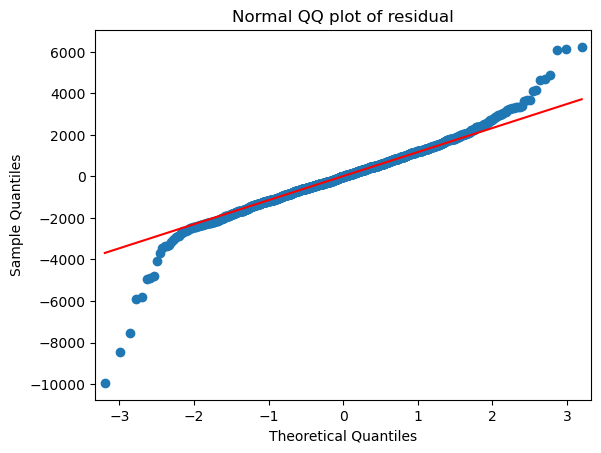

In [34]:
import statsmodels.api as smf
qqplot =smf.qqplot(model2.resid,line='q')
plt.title("Normal QQ plot of residual")
plt.show()

RESIDUAL PLOT FOR HOMOSCEDASTICITY 

In [36]:
def get_standardized_values( vals):
    return (vals - vals.mean())/vals.std()

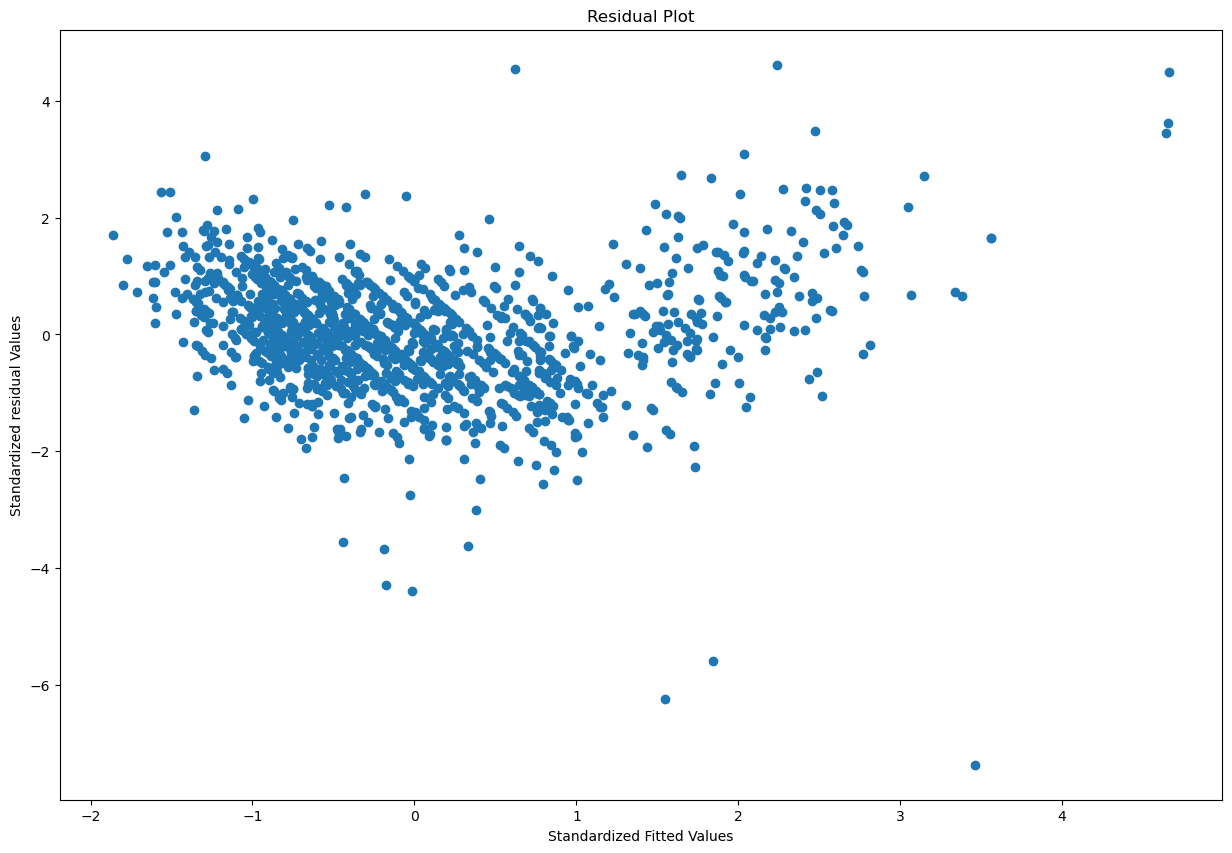

In [37]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model2.fittedvalues),
           get_standardized_values(model2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual Values')
plt.show()

Model Deletion Diagnostics 
Detecting outliers - Cooks distance 

In [56]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model2.get_influence()
(c,_) = model_influence.cooks_distance

In [57]:
c

array([4.65612171e-03, 2.75310869e-03, 3.34769910e-03, ...,
       1.16629428e-05, 9.92250611e-04, 1.62225890e-02])

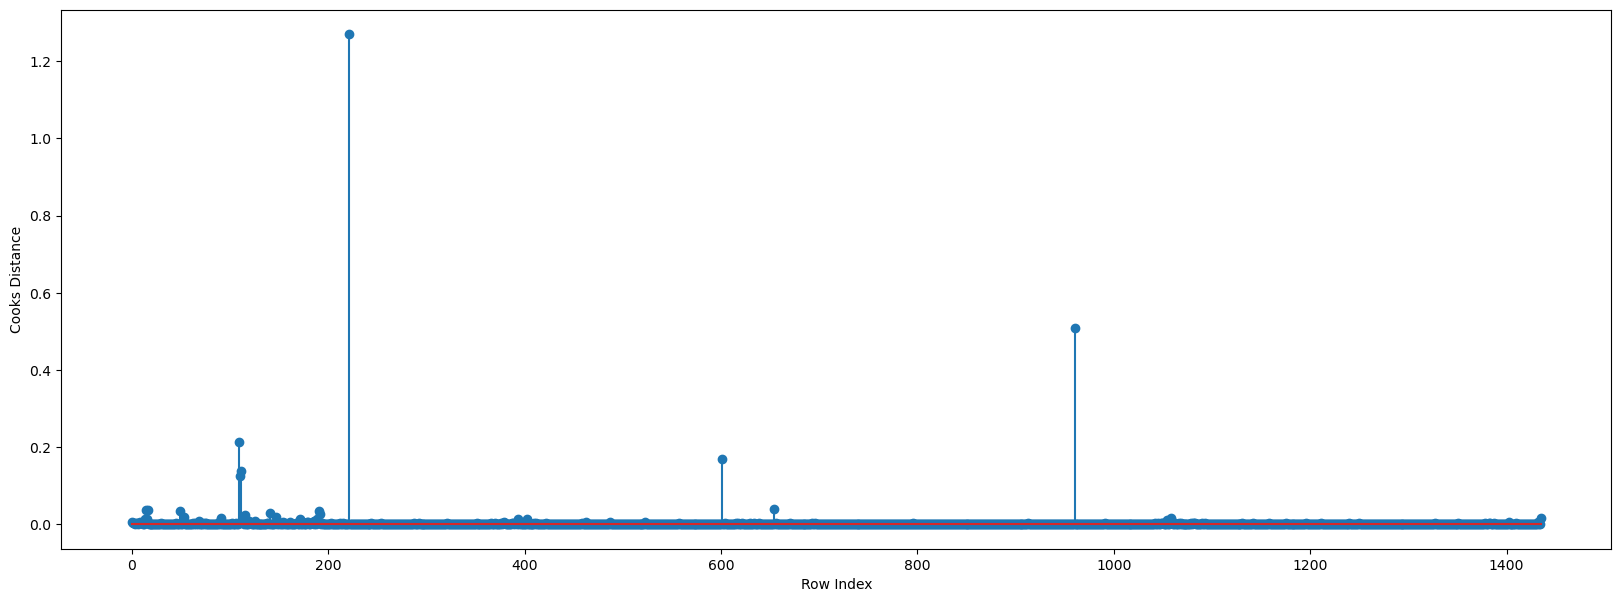

In [58]:
#infulence plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [59]:
#the cook's distance is considered as high if it is greater than 0.5 and extreme if it is greater than 1
(np.argmax(c),np.max(c))

(221, 1.2699400109579706)

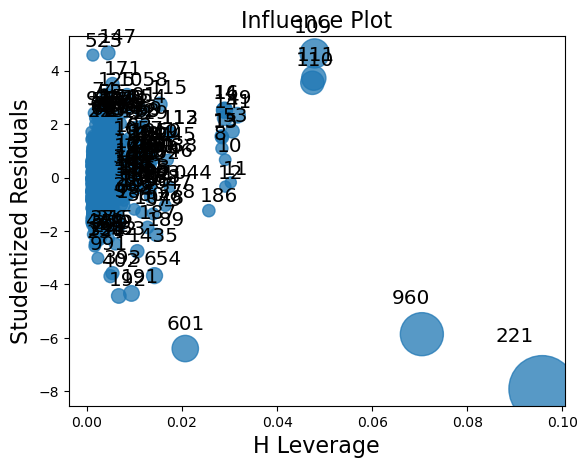

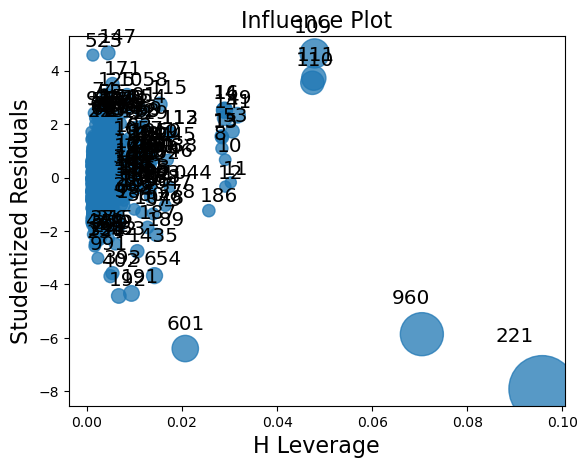

In [60]:
import statsmodels.api as sm 
sm.graphics.influence_plot(model2)

In [66]:
cars1

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,5,1025
1432,10845,72,19000,86,3,5,1015
1433,8500,71,17016,86,3,5,1015
1434,7250,70,16916,86,3,5,1015


In [67]:
cars1[cars1.index.isin([221])]

,Price,Age,KM,HP,Doors,Gears,Weight
221,12450,44,74172,110,5,5,1615


In [68]:
#Discard the data points which are influence and reasign the row number 
cars2=cars1.drop(cars1.index[221],axis=0).reset_index()

In [72]:
cars2.head()

,index,Price,Age,KM,HP,Doors,Gears,Weight
0,0,13500,23,46986,90,3,5,1165
1,1,13750,23,72937,90,3,5,1165
2,2,13950,24,41711,90,3,5,1165
3,3,14950,26,48000,90,3,5,1165
4,4,13750,30,38500,90,3,5,1170


In [70]:
#drop the original index
cars3=cars2.drop(['index'],axis=1)

In [71]:
cars3

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,5,1025
1431,10845,72,19000,86,3,5,1015
1432,8500,71,17016,86,3,5,1015
1433,7250,70,16916,86,3,5,1015


In [74]:
cars3[cars3.index.isin([221])]

,Price,Age,KM,HP,Doors,Gears,Weight
221,11950,40,73042,110,5,5,1075


In [79]:
#Rebuild the model
import statsmodels.formula.api as smf
model3 = smf.ols('Price~Age+KM+HP+Weight',data=cars3).fit()

In [80]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2342.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        00:59:07   Log-Likelihood:                -12347.
No. Observations:                1435   AIC:                         2.470e+04
Df Residuals:                    1430   BIC:                         2.473e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6249.9102    959.130     -6.516      0.000   -8131.363   -4368.457
Age         -119.3393      2.598    -45.933      0.000    -124.436    -114.243
KM            -0.0204      0.001    -17.166      0.000      -0.023      -0.018
HP            29.8800      2.487     12.015      0.000      25.002      34.758
Weight        20.5389      0.826     24.864      0.000      18.919      22.159
==============================================================================
Omnibus:                      151.298   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.129
Skew:                          -0.286   Prob(JB):                    3.12e-194
Kurtosis:                       6.818   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence1 = model3.get_influence()
(c,_) = model_influence1.cooks_distance

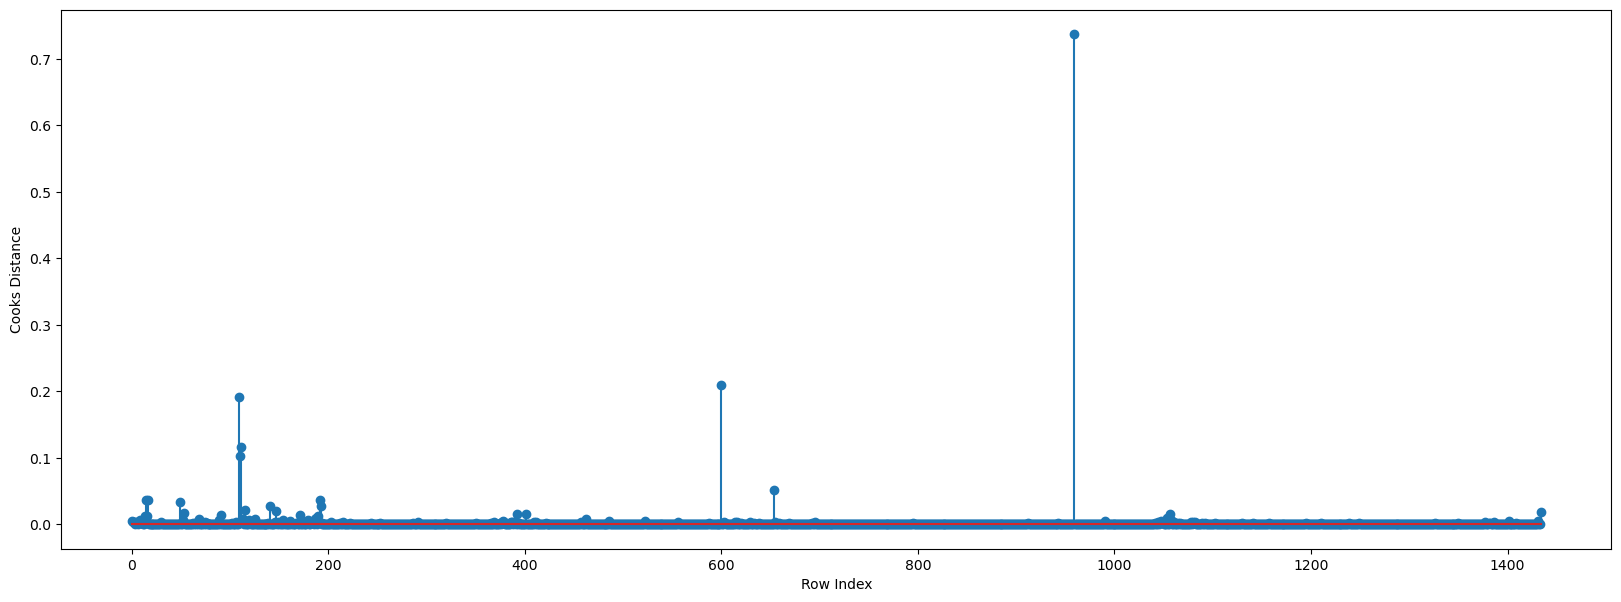

In [82]:
#infulence plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

PREDICTING THE NEW DATA 

In [84]:
cars3

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,5,1025
1431,10845,72,19000,86,3,5,1015
1432,8500,71,17016,86,3,5,1015
1433,7250,70,16916,86,3,5,1015


In [85]:
cars3=cars3.drop(columns=["Doors","Gears"])
cars3

,Price,Age,KM,HP,Weight
0,13500,23,46986,90,1165
1,13750,23,72937,90,1165
2,13950,24,41711,90,1165
3,14950,26,48000,90,1165
4,13750,30,38500,90,1170
...,...,...,...,...,...
1430,7500,69,20544,86,1025
1431,10845,72,19000,86,1015
1432,8500,71,17016,86,1015
1433,7250,70,16916,86,1015


In [88]:
#new data for prediction 
new_data= cars3.iloc[15:30,1:]
new_data

,Age,KM,HP,Weight
15,28,18739,192,1185
16,30,34000,192,1185
17,24,21716,110,1105
18,24,25563,110,1065
19,30,64359,110,1105
20,30,67660,110,1105
21,29,43905,110,1170
22,28,56349,110,1120
23,28,32220,110,1120
24,29,25813,110,1120


In [87]:
round(model3.predict(new_data),2)

15    20102.71
16    19553.41
17    16426.20
18    15526.34
19    14842.21
20    14775.02
21    16712.90
22    15552.01
23    16043.13
24    16054.20
25    16477.88
26    16115.15
27    15736.64
28    15800.47
29    16234.53
dtype: float64

In [90]:
model3.predict(cars3.iloc[:,1:])

0       16665.930190
1       16137.724984
2       16653.957910
3       16287.273283
4       16105.972821
            ...     
1430     8719.556288
1431     8187.575945
1432     8347.297506
1433     8468.672237
1434    10847.391866
Length: 1435, dtype: float64